Final loss=0.289


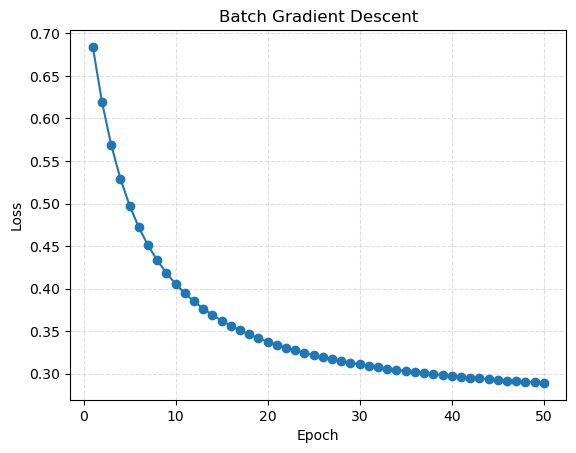

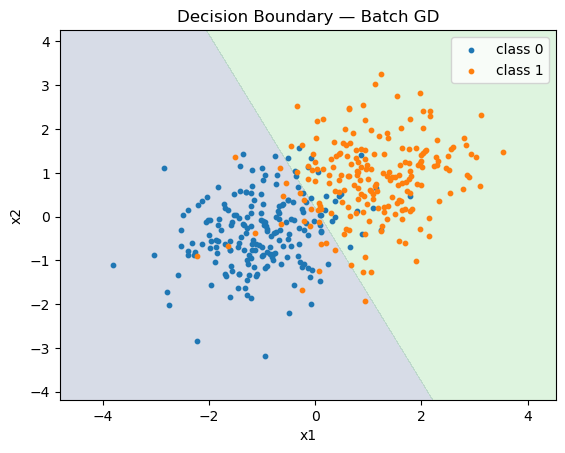

In [1]:
# batch_gd_logreg.py Batch Gradient Descent
import numpy as np, matplotlib.pyplot as plt

# ---- data ----
rng = np.random.default_rng(1337)
n_per_class = 200
mean0, mean1 = np.array([-1.0, -0.5]), np.array([1.0, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)
X = np.vstack([X0, X1]).astype(np.float64)
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])  # add bias

sigmoid = lambda z: 1/(1+np.exp(-z))

def loss_and_grad(W, Xb, y):
    p = sigmoid(Xb @ W)
    eps = 1e-12
    L = -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    g = Xb.T @ (p - y) / Xb.shape[0]
    return L, g

def acc(W): return (sigmoid(Xb @ W) >= 0.5).astype(int).mean() == y.mean()  # not used

# ---- training (batch GD) ----
eta, epochs = 0.2, 50
W = rng.normal(scale=0.01, size=3)
losses = []
for _ in range(epochs):
    L, g = loss_and_grad(W, Xb, y)
    W -= eta * g
    losses.append(L)

print(f"Final loss={losses[-1]:.3f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Batch Gradient Descent")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min,x1_max,200),
                     np.linspace(x2_min,x2_max,200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, probs, levels=[0, .5, 1], alpha=.2)
plt.scatter(X0[:,0], X0[:,1], s=10, label="class 0")
plt.scatter(X1[:,0], X1[:,1], s=10, label="class 1")
plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Decision Boundary — Batch GD")
plt.show()


Final loss=0.270


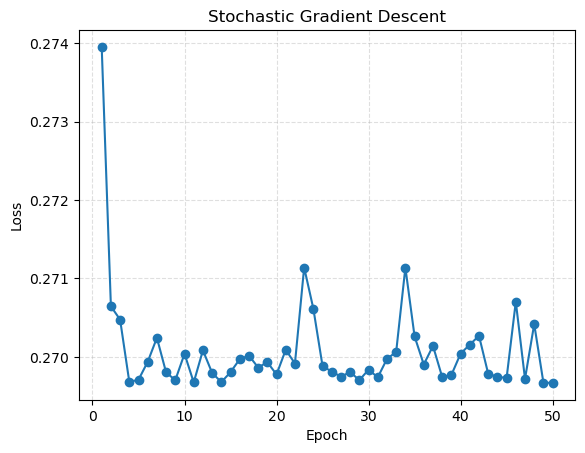

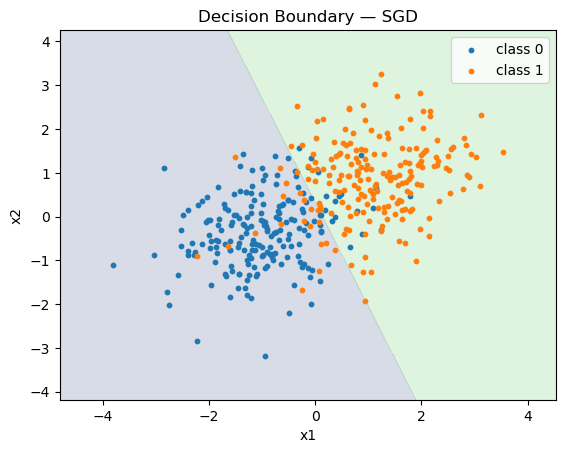

In [2]:
# sgd_logreg.py Stochastic Gradient Descent (sample-by-sample)
import numpy as np, matplotlib.pyplot as plt

# ---- data ----
rng = np.random.default_rng(1337)
n_per_class = 200
mean0, mean1 = np.array([-1.0, -0.5]), np.array([1.0, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)
X = np.vstack([X0, X1]).astype(np.float64)
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

sigmoid = lambda z: 1/(1+np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps=1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD) ----
eta, epochs = 0.05, 50
W = rng.normal(scale=0.01, size=3)
losses = []
for _ in range(epochs):
    idx = rng.permutation(Xb.shape[0])
    for i in idx:
        xi = Xb[i]
        yi = y[i]
        pi = sigmoid(xi @ W)
        grad_i = (pi - yi) * xi
        W -= eta * grad_i
    losses.append(full_loss(W))

print(f"Final loss={losses[-1]:.3f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min,x1_max,200),
                     np.linspace(x2_min,x2_max,200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, probs, levels=[0, .5, 1], alpha=.2)
plt.scatter(X0[:,0], X0[:,1], s=10, label="class 0")
plt.scatter(X1[:,0], X1[:,1], s=10, label="class 1")
plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Decision Boundary — SGD")
plt.show()


Final loss=0.280


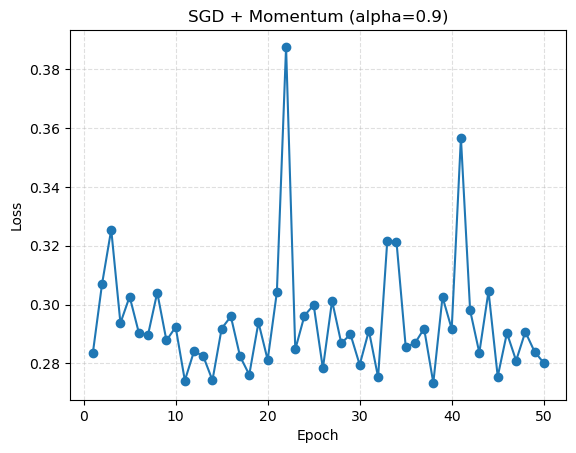

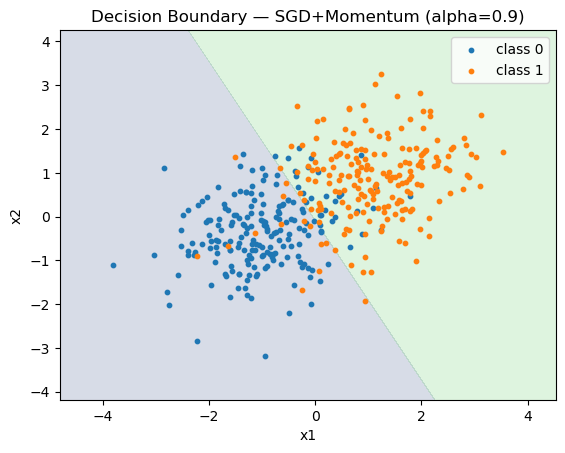

In [3]:
# sgd_momentum_logreg.py  SGD with Momentum (α)
import numpy as np, matplotlib.pyplot as plt

# ---- data ----
rng = np.random.default_rng(1337)
n_per_class = 200
mean0, mean1 = np.array([-1.0, -0.5]), np.array([1.0, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)
X = np.vstack([X0, X1]).astype(np.float64)
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

sigmoid = lambda z: 1/(1+np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps=1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD + Momentum) ----
eta, alpha, epochs = 0.05, 0.9, 50
W = rng.normal(scale=0.01, size=3)
v = np.zeros_like(W)  # ΔW(t) buffer
losses = []
for _ in range(epochs):
    idx = rng.permutation(Xb.shape[0])
    for i in idx:
        xi = Xb[i]
        yi = y[i]
        pi = sigmoid(xi @ W)
        grad_i = (pi - yi) * xi
        # ΔW(t+1) = -η ∇E + α ΔW(t)
        v = -eta * grad_i + alpha * v
        W = W + v
    losses.append(full_loss(W))

print(f"Final loss={losses[-1]:.3f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title(f"SGD + Momentum (alpha={alpha})")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min,x1_max,200),
                     np.linspace(x2_min,x2_max,200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, probs, levels=[0, .5, 1], alpha=.2)
plt.scatter(X0[:,0], X0[:,1], s=10, label="class 0")
plt.scatter(X1[:,0], X1[:,1], s=10, label="class 1")
plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.title(f"Decision Boundary — SGD+Momentum (alpha={alpha})")
plt.show()


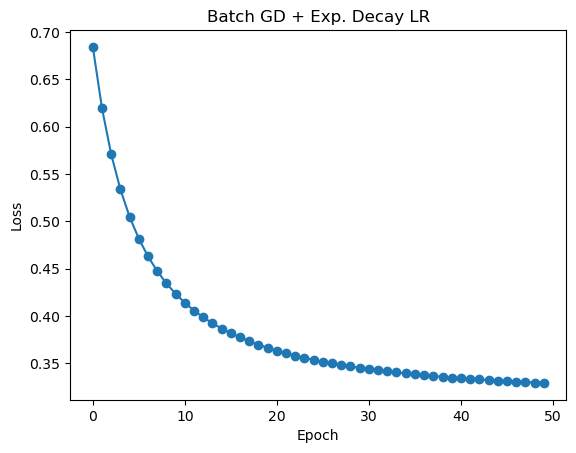

In [4]:
# Batch GD with Exponential Decay LR
import numpy as np, matplotlib.pyplot as plt

# ---- dataset ----
rng = np.random.default_rng(1337)
n = 200
mean0, mean1 = np.array([-1, -0.5]), np.array([1, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, n)
X1 = rng.multivariate_normal(mean1, cov, n)
X = np.vstack([X0, X1]); y = np.hstack([np.zeros(n), np.ones(n)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

sigmoid = lambda z: 1/(1+np.exp(-z))
def loss_grad(W): 
    p=sigmoid(Xb@W); eps=1e-12
    L=-np.mean(y*np.log(p+eps)+(1-y)*np.log(1-p+eps))
    g=Xb.T@(p-y)/Xb.shape[0]; return L,g

# ---- train ----
eta0, delta, epochs = 0.2, 0.96, 50
W=rng.normal(scale=0.01,size=3); losses=[]
for t in range(epochs):
    L,g=loss_grad(W)
    eta=eta0*(delta**t)             # exponential decay
    W-=eta*g; losses.append(L)

plt.plot(losses,marker='o'); plt.title("Batch GD + Exp. Decay LR")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()


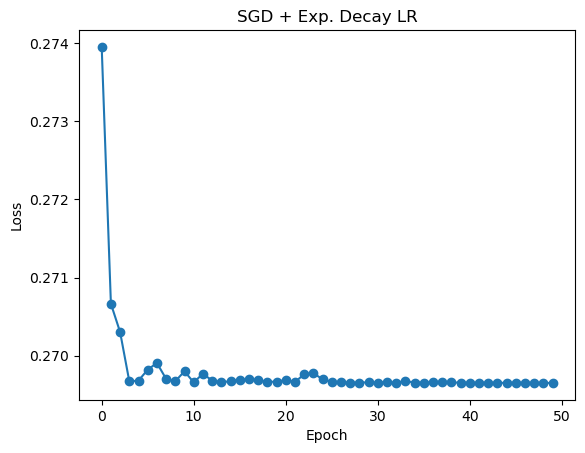

In [5]:
#SGD (sample-wise) with Exponential Decay LR
import numpy as np, matplotlib.pyplot as plt

# ---- dataset ----
rng = np.random.default_rng(1337)
n = 200
mean0, mean1 = np.array([-1, -0.5]), np.array([1, 0.8])
cov = np.array([[0.8,0.2],[0.2,0.8]])
X0 = rng.multivariate_normal(mean0,cov,n)
X1 = rng.multivariate_normal(mean1,cov,n)
X=np.vstack([X0,X1]); y=np.hstack([np.zeros(n),np.ones(n)])
Xb=np.hstack([X,np.ones((X.shape[0],1))])

sigmoid=lambda z:1/(1+np.exp(-z))
def full_loss(W):
    p=sigmoid(Xb@W); eps=1e-12
    return -np.mean(y*np.log(p+eps)+(1-y)*np.log(1-p+eps))

# ---- train ----
eta0, delta, epochs = 0.05, 0.96, 50
W=rng.normal(scale=0.01,size=3); losses=[]
for t in range(epochs):
    eta=eta0*(delta**t)             # exponential decay
    idx=rng.permutation(len(y))
    for i in idx:
        xi,yi=Xb[i],y[i]; pi=sigmoid(xi@W)
        grad=(pi-yi)*xi
        W-=eta*grad
    losses.append(full_loss(W))

plt.plot(losses,marker='o'); plt.title("SGD + Exp. Decay LR")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()


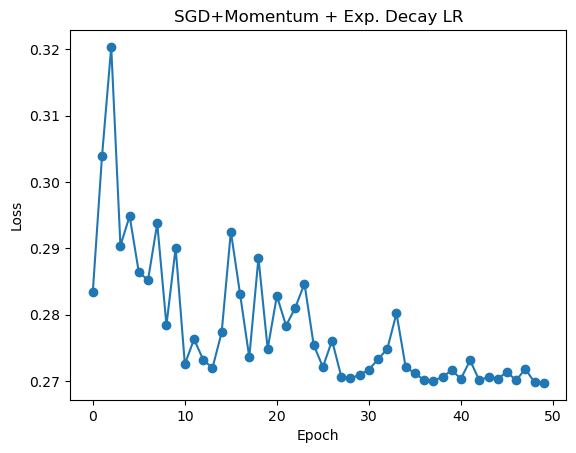

In [7]:
#SGD with Momentum + Exponential Decay LR
import numpy as np, matplotlib.pyplot as plt

# ---- dataset ----
rng = np.random.default_rng(1337)
n=200
mean0,mean1=np.array([-1,-0.5]),np.array([1,0.8])
cov=np.array([[0.8,0.2],[0.2,0.8]])
X0=rng.multivariate_normal(mean0,cov,n)
X1=rng.multivariate_normal(mean1,cov,n)
X=np.vstack([X0,X1]); y=np.hstack([np.zeros(n),np.ones(n)])
Xb=np.hstack([X,np.ones((X.shape[0],1))])

sigmoid=lambda z:1/(1+np.exp(-z))
def full_loss(W):
    p=sigmoid(Xb@W); eps=1e-12
    return -np.mean(y*np.log(p+eps)+(1-y)*np.log(1-p+eps))

# ---- train ----
eta0, delta, alpha, epochs = 0.05, 0.96, 0.9, 50
W=rng.normal(scale=0.01,size=3); v=np.zeros_like(W); losses=[]
for t in range(epochs):
    eta=eta0*(delta**t)             # exponential decay
    idx=rng.permutation(len(y))
    for i in idx:
        xi,yi=Xb[i],y[i]; pi=sigmoid(xi@W)
        grad=(pi-yi)*xi
        v = -eta*grad + alpha*v
        W = W+v
    losses.append(full_loss(W))

plt.plot(losses,marker='o'); plt.title("SGD+Momentum + Exp. Decay LR")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()
